In [29]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
df=pd.read_csv("USA_Housing.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


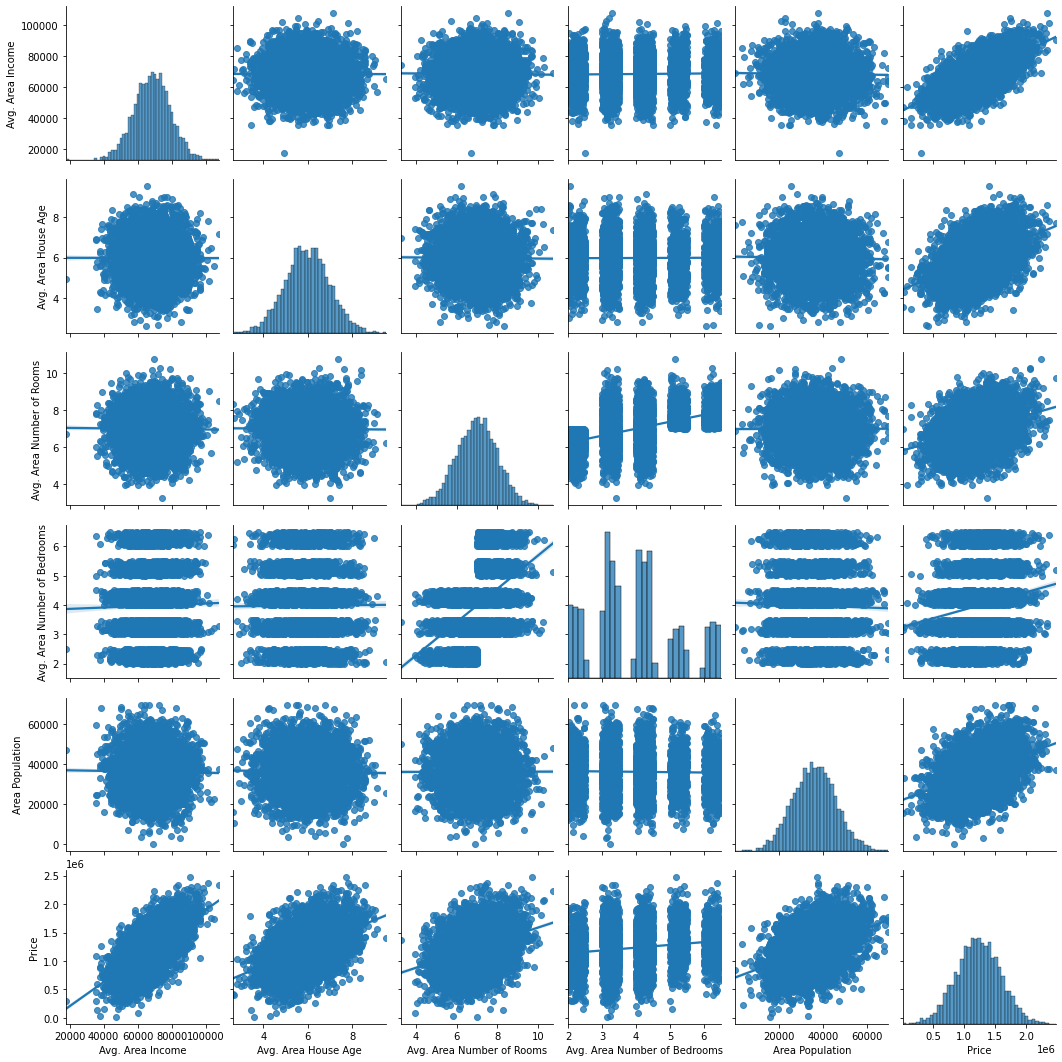

In [12]:
sb.pairplot(df,kind='reg')

In [31]:
x=df.iloc[:,0:5]
y=df.iloc[:,5:6]

In [ ]:
from sklearn.impute import SimpleImputer
im=SimpleImputer(missing_values='NaN',strategy='mean')
im=im.fit(x)
x=im.transform(x)
#x=im.fit_transform(x)

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()#approach 1,2,3
x=le.fit_transform(x)
oh=OneHotEncoder(categories=[0,1,2,3])#approach get_dummies
x=oh.fit_transform(x)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [32]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=10)
print(x_train,x_test,y_train,y_test)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
2733       69180.01607             6.583566                   5.514897   
447        60893.76408             4.128880                   7.522949   
970        76114.15936             6.769699                   7.321610   
125        71202.95692             4.318869                   6.634954   
798        67125.14983             4.969943                   7.639188   
...                ...                  ...                        ...   
1180       72695.11514             5.363777                   6.871980   
3441       75479.76745             6.009215                   6.475022   
1344       70670.87889             6.581627                   6.477495   
4623       73804.90862             6.731999                   7.617261   
1289       63867.10459             6.394230                   8.958300   

      Avg. Area Number of Bedrooms  Area Population  
2733                          2.29      38114.52633  
447

In [33]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

h=lr.predict(x_test)#doing prediction
print(x_test[0:5],h[0:5],y_test[0:5])

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
245        77300.03144             5.260975                   6.936548   
4493       69956.75188             4.982102                   7.860718   
4583       62654.35948             5.674788                   6.850386   
2242       38868.25031             6.965104                   8.966906   
3407       66629.25456             7.593559                   7.073691   

      Avg. Area Number of Bedrooms  Area Population  
245                           4.49      29499.04095  
4493                          3.17      35148.16491  
4583                          4.24      36718.51231  
2242                          4.22      25432.07677  
3407                          4.48      37261.31828   [[1195058.5766485 ]
 [1185265.81519812]
 [1046786.1889858 ]
 [ 827779.10074073]
 [1485163.51851682]]             Price
245   1118047.991
4493  1326946.725
4583  1053484.869
2242   759044.688
3407  1381117.701


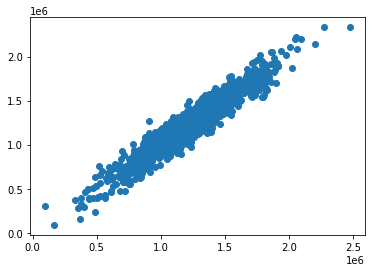

In [34]:
plt.scatter(h,y_test)

In [35]:
print(lr.coef_)#coefficents

[[2.15815476e+01 1.65387561e+05 1.19480881e+05 1.26155975e+03
  1.52330337e+01]]


In [36]:
coef=lr.coef_.reshape((5,1))
c=x.columns

In [37]:
coef_df=pd.DataFrame(coef,c,columns=['coefficient'])
coef_df#to check whether coefficient is -ve or +ve we check it by correlation which can be find out in pairplot graph
#on increasing feature by 1 the label got increase by its coefficient

,coefficient
Avg. Area Income,21.581548
Avg. Area House Age,165387.561304
Avg. Area Number of Rooms,119480.880519
Avg. Area Number of Bedrooms,1261.559754
Area Population,15.233034


In [38]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,h))#cost func

100373.22954436623

In [39]:
lr.score(x_test,y_test)

0.919742195833852

In [40]:
pd.to_pickle(lr,"housing_v1")#saves(deploy) the model

In [41]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')